In [632]:
# data analysis and wrangling
import math
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats
from scipy.special import inv_boxcox

# visualization
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

# machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix


In [633]:
data = pd.read_csv('./downloads/KaggleV2-May-2016.csv',encoding = 'utf8')

In [634]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [635]:
data.shape

(110527, 14)

In [636]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [637]:
a = data.isnull().mean()*100
a.sort_values(ascending = False)

No-show           0.0
SMS_received      0.0
Handcap           0.0
Alcoholism        0.0
Diabetes          0.0
Hipertension      0.0
Scholarship       0.0
Neighbourhood     0.0
Age               0.0
AppointmentDay    0.0
ScheduledDay      0.0
Gender            0.0
AppointmentID     0.0
PatientId         0.0
dtype: float64

In [638]:
data["PatientId"].value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.321328e+12

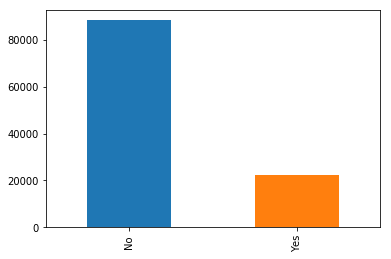

In [639]:
data["No-show"].value_counts().plot("bar")

In [640]:
data["PatientId"] = data["PatientId"].astype("category")
data["PatientId"] = data["PatientId"].cat.codes
x = [0] * len(data["PatientId"])

In [641]:
data1 = data[::-1]
data1.head()  

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110526,52483,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No
110525,45960,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110524,27287,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110523,14603,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110522,12800,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No


In [642]:
y = []
for i in data1["PatientId"]:
    x[i] = x[i] + 1
    y.append(x[i])

In [643]:
data1["Number_of_visits"] = y

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [644]:
data = data1[::-1]

In [645]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Number_of_visits
0,30845,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2
1,55325,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2
2,15722,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2
3,9018,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2
4,23941,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


In [646]:
data[data["PatientId"] == 30845]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Number_of_visits
0,30845,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2
1157,30845,5639907,F,2016-04-29T09:47:47Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1


In [647]:
#number of patients

In [648]:
data = data.drop("AppointmentID",1)

In [649]:
data["ScheduledDay"] = data["ScheduledDay"].apply(lambda x: x.split("T")[0])
data["AppointmentDay"] = data["AppointmentDay"].apply(lambda x: x.split("T")[0])

In [650]:
data["ScheduledDay"] = pd.to_datetime(data["ScheduledDay"])
data["AppointmentDay"] = pd.to_datetime(data["AppointmentDay"])

In [651]:
data["sch_to_appt"] = data["AppointmentDay"] - data["ScheduledDay"]
data["sch_to_appt"] = data["sch_to_appt"].apply(lambda x: x.days)

In [652]:
b= []
a = (data[data["sch_to_appt"] <1]["No-show"]).value_counts()
print(a)
b.append(a[0]/(a[0]+a[1])*100)
b

No     36771
Yes     1797
Name: No-show, dtype: int64


[95.34069695084007]

In [653]:
a = (data[(data["sch_to_appt"] >5) & (data["sch_to_appt"] <10)]["No-show"]).value_counts()
print(a)
b.append(a[0]/(a[0]+a[1])*100)
b

No     9460
Yes    3420
Name: No-show, dtype: int64


[95.34069695084007, 73.4472049689441]

In [654]:
a = (data[(data["sch_to_appt"] >10) & (data["sch_to_appt"] < 50)]["No-show"]).value_counts()
print(a)
b.append(a[0]/(a[0]+a[1])*100)
b

No     20934
Yes    10202
Name: No-show, dtype: int64


[95.34069695084007, 73.4472049689441, 67.2340698869476]

In [655]:
a = (data[data["sch_to_appt"] > 50]["No-show"]).value_counts()
print(a)
b.append(a[0]/(a[0]+a[1])*100)
b

No     2179
Yes     949
Name: No-show, dtype: int64


[95.34069695084007, 73.4472049689441, 67.2340698869476, 69.6611253196931]

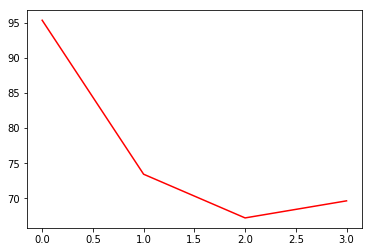

In [656]:
plt.plot(b,"r")

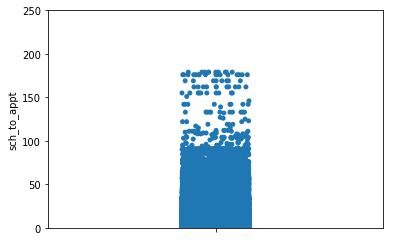

In [657]:
sns.stripplot(data = data, y = 'sch_to_appt', jitter = True)
plt.ylim(0, 250)
plt.show()

In [658]:
data["ScheduledDay"] = data["ScheduledDay"].dt.weekday_name
data["AppointmentDay"] = data["AppointmentDay"].dt.weekday_name

In [659]:
def count_plot(data,column):
    plt.figure(figsize=(13,6))
    plt.xticks(rotation=90)
    ax = sns.countplot(x=data[column],hue=data["No-show"],data=data)
    ax.set_title(column)
    plt.show()

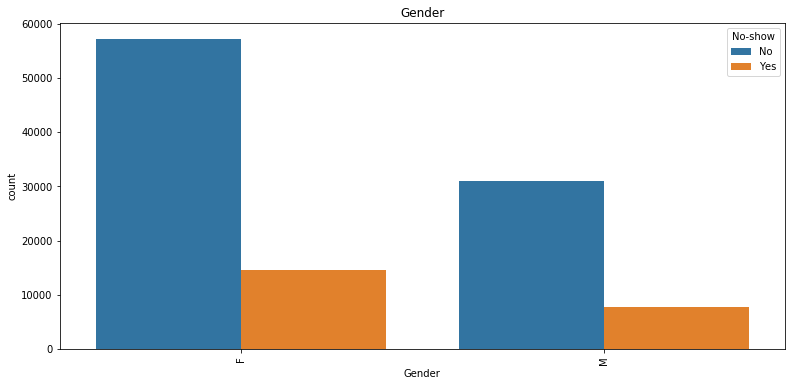

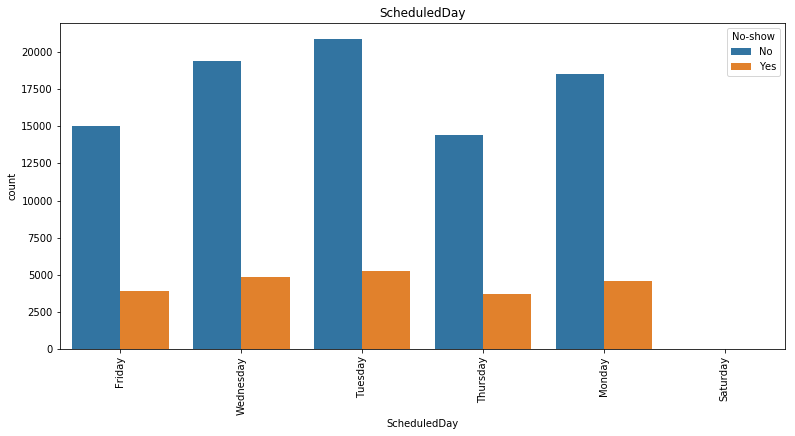

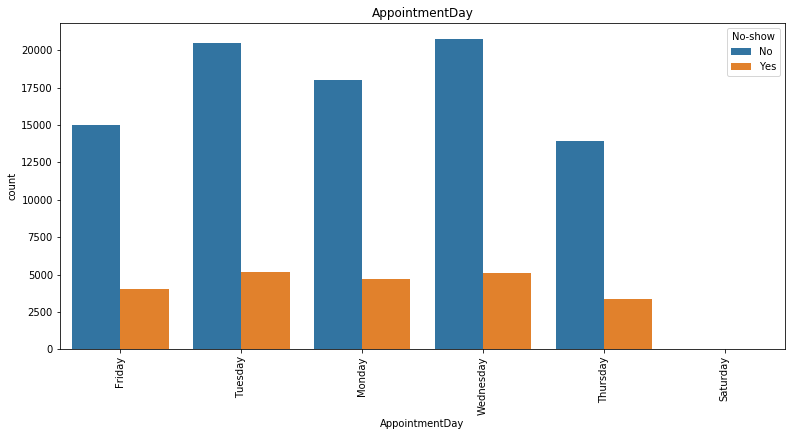

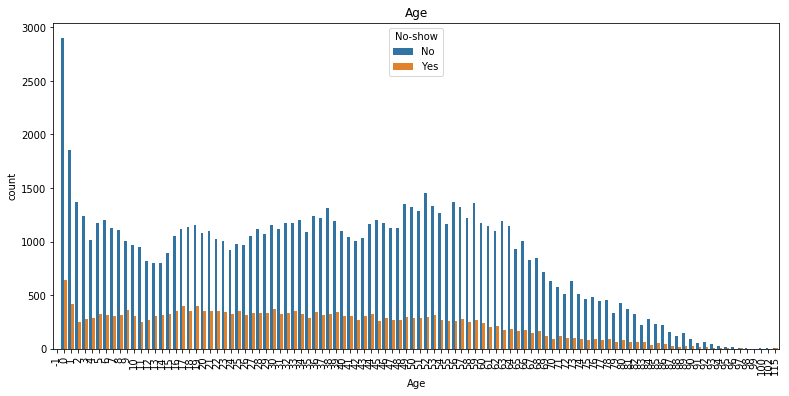

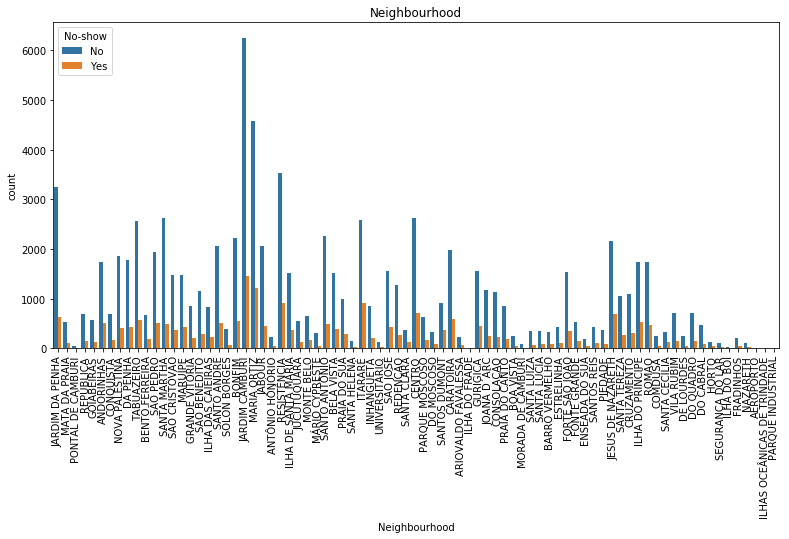

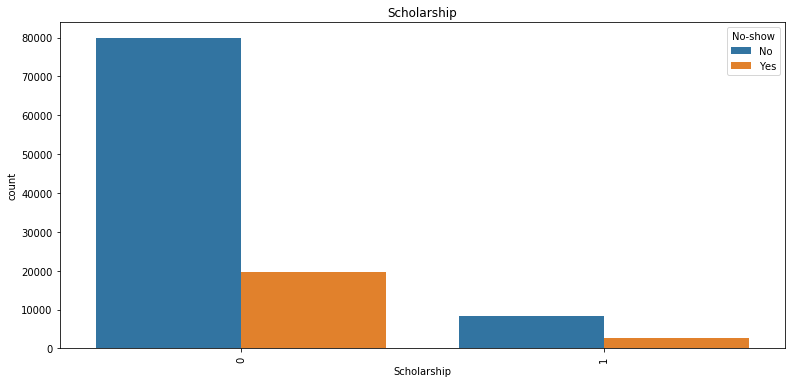

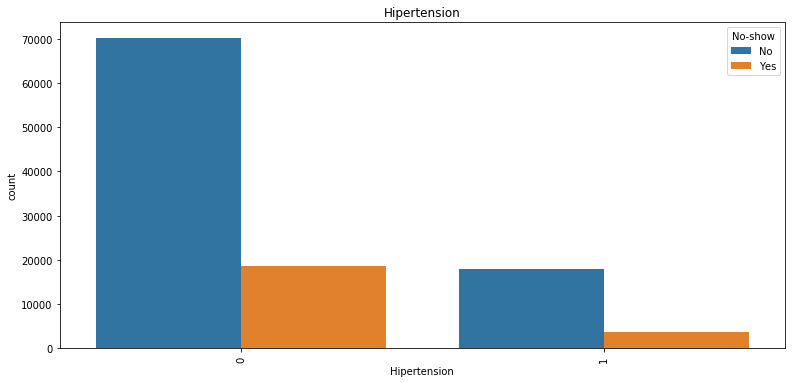

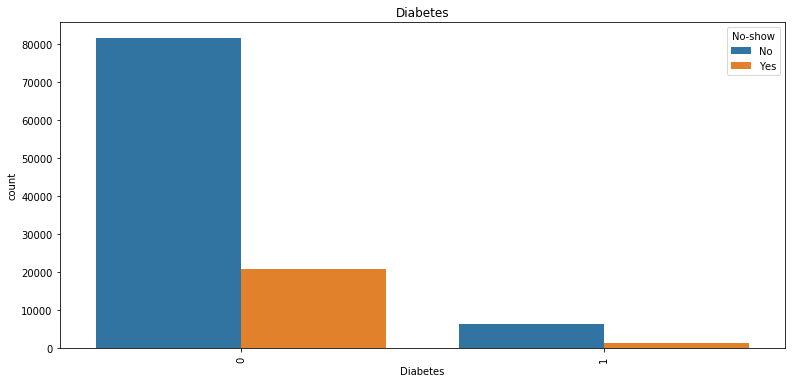

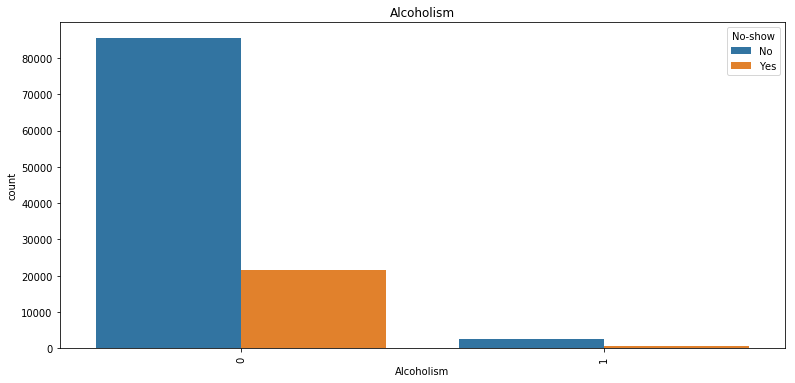

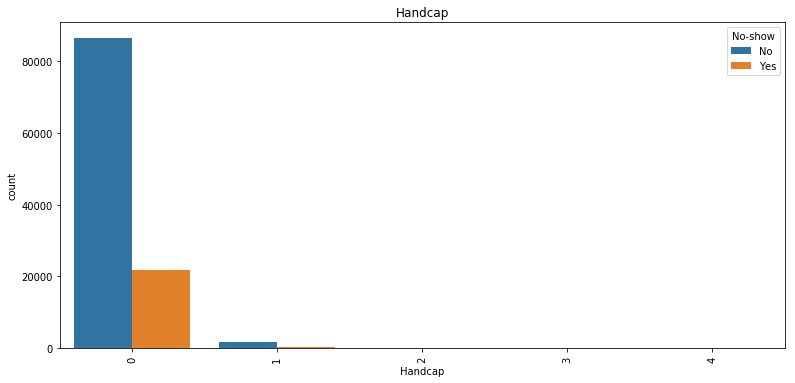

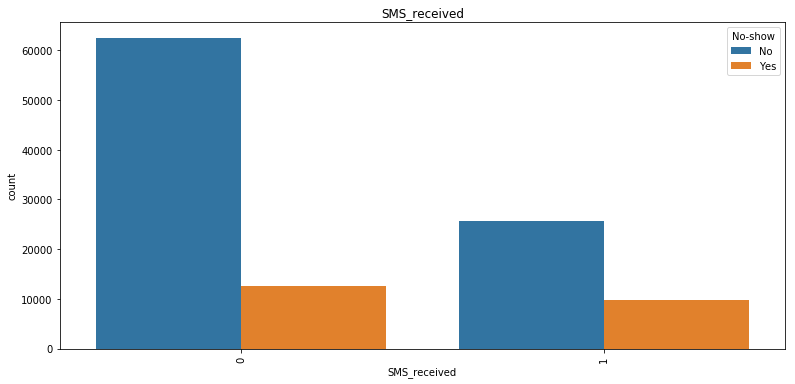

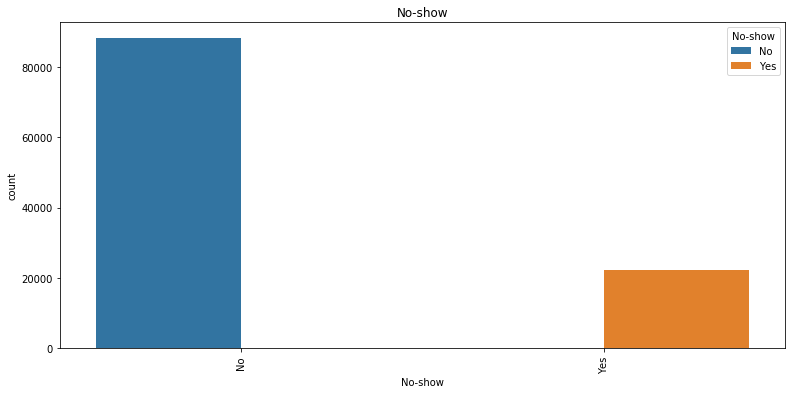

In [660]:
for i in ['Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']:
    count_plot(data,i)

In [661]:
le = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)

In [662]:
data = data[data["Age"] > -1]

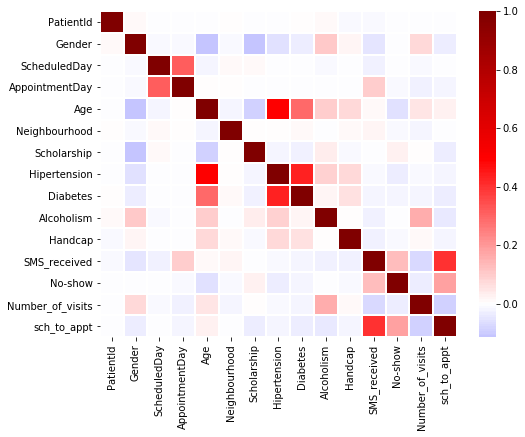

In [663]:
 plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),center = 0,cmap="seismic",linewidths=1)

In [664]:
X = data["No-show"]
Y = data.drop(["No-show"],1)

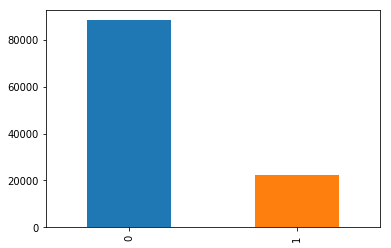

In [665]:
X.value_counts().plot("bar")

In [666]:
X_train, X_test, y_train, y_test = train_test_split(Y, X, train_size=0.8, random_state=42)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [667]:
models = [ExtraTreesClassifier(),GaussianNB(),RandomForestClassifier(random_state = 0),LogisticRegression(),
         GradientBoostingClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
x = []
for model in models:
    model.fit(X_train,y_train)
    x.append(model.score(X_test,y_test)*100)

In [668]:
model = pd.DataFrame(["ExtraTreesClassifier","GaussianNB","RandomForestClassifier","LogisticRegression",
         "GradientBoostingClassifier","DecisionTreeClassifier","KNeighborsClassifier"],columns = ["Model"])
model["Scores"] = x
model.sort_values(by = "Scores",ascending=False)

,Model,Scores
4,GradientBoostingClassifier,79.955668
3,LogisticRegression,79.281643
2,RandomForestClassifier,78.815706
0,ExtraTreesClassifier,78.539763
6,KNeighborsClassifier,77.377183
1,GaussianNB,76.377454
5,DecisionTreeClassifier,71.514521


In [669]:
def report(modelname,X_train,y_train,X_test,y_test):
    model = modelname
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print(classification_report(y_test, y_pred))
    print((pd.Series(y_pred)).value_counts())

In [670]:
for i in models:
    print(i)
    print("---------------------------------------------------------------------------------------")
    report(i,X_train,y_train,X_test,y_test)
    print("\n")
    print("---------------------------------------------------------------------------------------")

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
---------------------------------------------------------------------------------------
[[16658  1011]
 [ 3754   683]]


             precision    recall  f1-score   support

          0       0.82      0.94      0.87     17669
          1       0.40      0.15      0.22      4437

avg / total       0.73      0.78      0.74     22106

0    20412
1     1694
dtype: int64


---------------------------------------------------------------------------------------
GaussianNB(priors=None)
---------------------------------------------------------------------------------------
[[16253  1416]
 [ 3806  

<Container object of 14 artists>

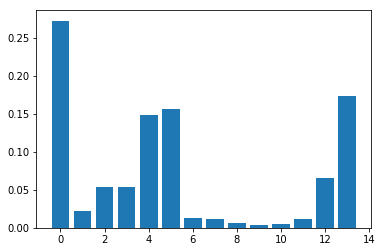

In [533]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
plt.bar(range(0,len(model.feature_importances_)),model.feature_importances_)

## UNDERSAMPLING

In [711]:
train,test = train_test_split(data, train_size=0.8, random_state=42)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [712]:
data_class_0 = train[train["No-show"]==0]
data_class_1 = train[train["No-show"]==1]

In [713]:
data_undersample_0 = data_class_0.sample(len(data_class_1))

In [714]:
data_under = pd.concat([data_class_1,data_undersample_0])

In [715]:
data_under.shape

(35764, 15)

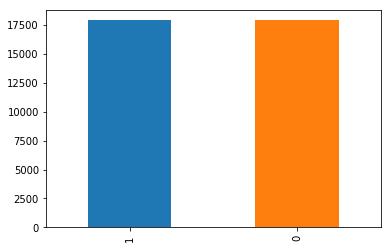

In [716]:
data_under["No-show"].value_counts().plot("bar")

In [717]:
y_train = data_under["No-show"]
X_train = data_under.drop(["No-show"],1)
y_test = test["No-show"]
X_test = test.drop(["No-show"],1)

In [718]:
models = [ExtraTreesClassifier(),GaussianNB(),RandomForestClassifier(random_state = 0),LogisticRegression(),
         GradientBoostingClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
x = []
for model in models:
    model.fit(X_train,y_train)
    x.append(model.score(X_test,y_test)*100)

In [719]:
model = pd.DataFrame(["ExtraTreesClassifier","GaussianNB","RandomForestClassifier","LogisticRegression",
         "GradientBoostingClassifier","DecisionTreeClassifier","KNeighborsClassifier"],columns = ["Model"])
model["Scores"] = x
model.sort_values(by = "Scores",ascending=False)

,Model,Scores
3,LogisticRegression,66.117796
2,RandomForestClassifier,64.995929
0,ExtraTreesClassifier,64.701891
5,DecisionTreeClassifier,59.929431
4,GradientBoostingClassifier,57.789740
6,KNeighborsClassifier,55.016738
1,GaussianNB,38.903465


In [720]:
for i in models:
    print(i)
    print("---------------------------------------------------------------------------------------")
    report(i,X_train,y_train,X_test,y_test)
    print("\n")
    print("---------------------------------------------------------------------------------------")

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
---------------------------------------------------------------------------------------
[[11484  6185]
 [ 1716  2721]]


             precision    recall  f1-score   support

          0       0.87      0.65      0.74     17669
          1       0.31      0.61      0.41      4437

avg / total       0.76      0.64      0.68     22106

0    13200
1     8906
dtype: int64


---------------------------------------------------------------------------------------
GaussianNB(priors=None)
---------------------------------------------------------------------------------------
[[ 4858 12811]
 [  695  

In [ ]:
clf = GradientBoostingClassifier()

param_grid = {
    #'loss' : ["deviance", "exponential"],
    'learning_rate' : [0.01,0.1,1],
    #'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 200],
    'max_depth': [3, 5, 15],
    #'max_features': [3, 5, 10, 20]
    
}

In [625]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [626]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [627]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

Best params for precision_score
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg     14517      3152
pos      2634      1803


In [629]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
         'param_max_depth',
         'param_n_estimators']].head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_n_estimators
2,0.615359,0.399172,0.659859,5,100
0,0.603938,0.406163,0.655989,3,100
3,0.596781,0.561514,0.672811,5,200
9,0.594117,0.589083,0.674667,5,200
1,0.592784,0.517616,0.664668,3,200


In [630]:
y_pred = grid_search_clf.predict(X_test)

In [631]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
print((pd.Series(y_pred)).value_counts())

[[14517  3152]
 [ 2634  1803]]


             precision    recall  f1-score   support

          0       0.85      0.82      0.83     17669
          1       0.36      0.41      0.38      4437

avg / total       0.75      0.74      0.74     22106

0    17151
1     4955
dtype: int64


In [576]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.6588172434852488


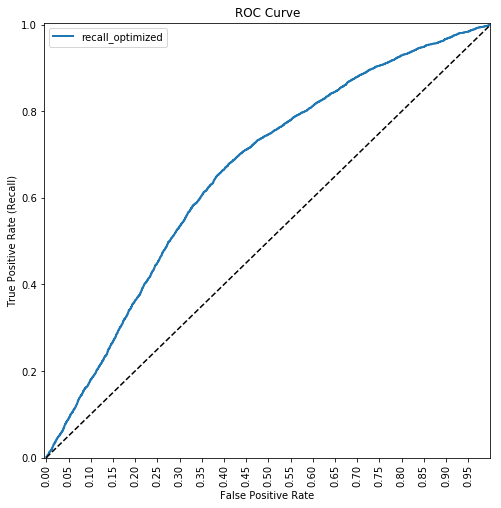

In [728]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_scores = model.predict_proba(X_test)[:,1]
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [736]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [730]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

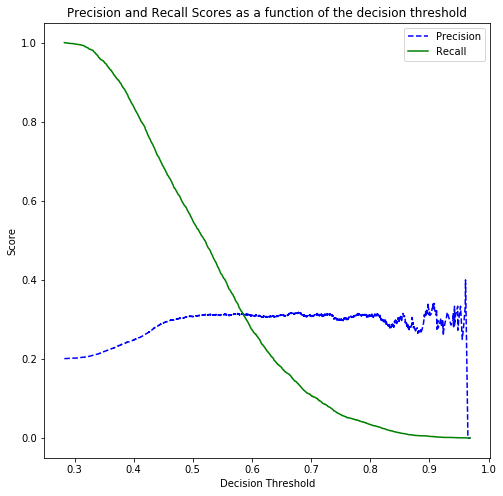

In [740]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [581]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

In [782]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred = adjusted_classes(y_pred,0.58)

In [783]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
print((pd.Series(y_pred)).value_counts())

[[14529  3140]
 [ 3003  1434]]


             precision    recall  f1-score   support

          0       0.83      0.82      0.83     17669
          1       0.31      0.32      0.32      4437

avg / total       0.73      0.72      0.72     22106

0    17532
1     4574
dtype: int64


## OVERSAMPLING

In [686]:
data_oversample_1 = data_class_1.sample(len(data_class_0),replace=True)

In [687]:
data_over = pd.concat([data_class_0,data_oversample_1])

In [688]:
data_over.shape

(141078, 15)

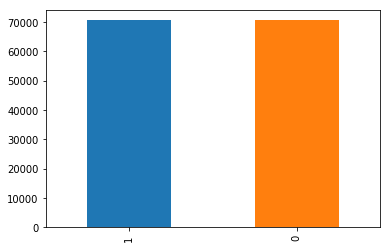

In [689]:
data_over["No-show"].value_counts().plot("bar")

In [690]:
y_train = data_over["No-show"]
X_train = data_over.drop(["No-show"],1)
y_test = test["No-show"]
X_test = test.drop(["No-show"],1)

In [691]:
models = [ExtraTreesClassifier(),GaussianNB(),RandomForestClassifier(random_state = 0),LogisticRegression(),
         GradientBoostingClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
x = []
for model in models:
    model.fit(X_train,y_train)
    x.append(model.score(X_test,y_test)*100)

In [692]:
model = pd.DataFrame(["ExtraTreesClassifier","GaussianNB","RandomForestClassifier","LogisticRegression",
         "GradientBoostingClassifier","DecisionTreeClassifier","KNeighborsClassifier"],columns = ["Model"])
model["Scores"] = x
model.sort_values(by = "Scores",ascending=False)

,Model,Scores
0,ExtraTreesClassifier,78.725233
2,RandomForestClassifier,76.816249
5,DecisionTreeClassifier,72.772098
3,LogisticRegression,66.280648
6,KNeighborsClassifier,60.807021
4,GradientBoostingClassifier,58.237583
1,GaussianNB,36.980910


In [693]:
for i in models:
    print(i)
    print("---------------------------------------------------------------------------------------")
    report(i,X_train,y_train,X_test,y_test)
    print("\n")
    print("---------------------------------------------------------------------------------------")

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
---------------------------------------------------------------------------------------
[[16701   968]
 [ 3762   675]]


             precision    recall  f1-score   support

          0       0.82      0.95      0.88     17669
          1       0.41      0.15      0.22      4437

avg / total       0.73      0.79      0.74     22106

0    20463
1     1643
dtype: int64


---------------------------------------------------------------------------------------
GaussianNB(priors=None)
---------------------------------------------------------------------------------------
[[ 4343 13326]
 [  605  

## OVERSAMPLING WITH SMOTE

In [694]:
from imblearn.over_sampling import SMOTE 

In [695]:
os = SMOTE(random_state = 0)
Y = train["No-show"]
X = train.drop("No-show",1)

In [696]:
X_train,y_train = os.fit_sample(X,Y)

In [697]:
y_test = test["No-show"]
X_test = test.drop("No-show",1)

In [698]:
models = [ExtraTreesClassifier(),GaussianNB(),RandomForestClassifier(random_state = 0),LogisticRegression(),
         GradientBoostingClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
x = []
for model in models:
    model.fit(X_train,y_train)
    x.append(model.score(X_test,y_test)*100)

In [699]:
model = pd.DataFrame(["ExtraTreesClassifier","GaussianNB","RandomForestClassifier","LogisticRegression",
         "GradientBoostingClassifier","DecisionTreeClassifier","KNeighborsClassifier"],columns = ["Model"])
model["Scores"] = x
model.sort_values(by = "Scores",ascending=False)

,Model,Scores
4,GradientBoostingClassifier,79.874242
2,RandomForestClassifier,78.069302
0,ExtraTreesClassifier,77.901927
5,DecisionTreeClassifier,70.826925
3,LogisticRegression,65.516149
6,KNeighborsClassifier,61.928888
1,GaussianNB,32.384873


In [700]:
for i in models:
    print(i)
    print("---------------------------------------------------------------------------------------")
    report(i,X_train,y_train,X_test,y_test)
    print("\n")
    print("---------------------------------------------------------------------------------------")

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
---------------------------------------------------------------------------------------
[[16424  1245]
 [ 3575   862]]


             precision    recall  f1-score   support

          0       0.82      0.93      0.87     17669
          1       0.41      0.19      0.26      4437

avg / total       0.74      0.78      0.75     22106

0    19999
1     2107
dtype: int64


---------------------------------------------------------------------------------------
GaussianNB(priors=None)
---------------------------------------------------------------------------------------
[[ 3189 14480]
 [  467  